In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_theme(style="darkgrid")

from dotenv import load_dotenv
import os
import glob
import json

In [4]:
# directory management
pilot_name = "rn-iii-pilot-4"
to_save_plots = True
data_path = f"../../data/for_plots/{pilot_name}"

figures_path = f"../figures/{pilot_name}"
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

scores_df = pd.read_csv(os.path.join(data_path,"scores.csv"),index_col=0)
trials_time = pd.read_csv(os.path.join(data_path,"trials_time.csv"))
sessions_time = pd.read_csv(os.path.join(data_path,"sessions_time.csv"))
post_survey_df = pd.read_csv(os.path.join(data_path,"post_survey_df.csv"))

## post survey plots

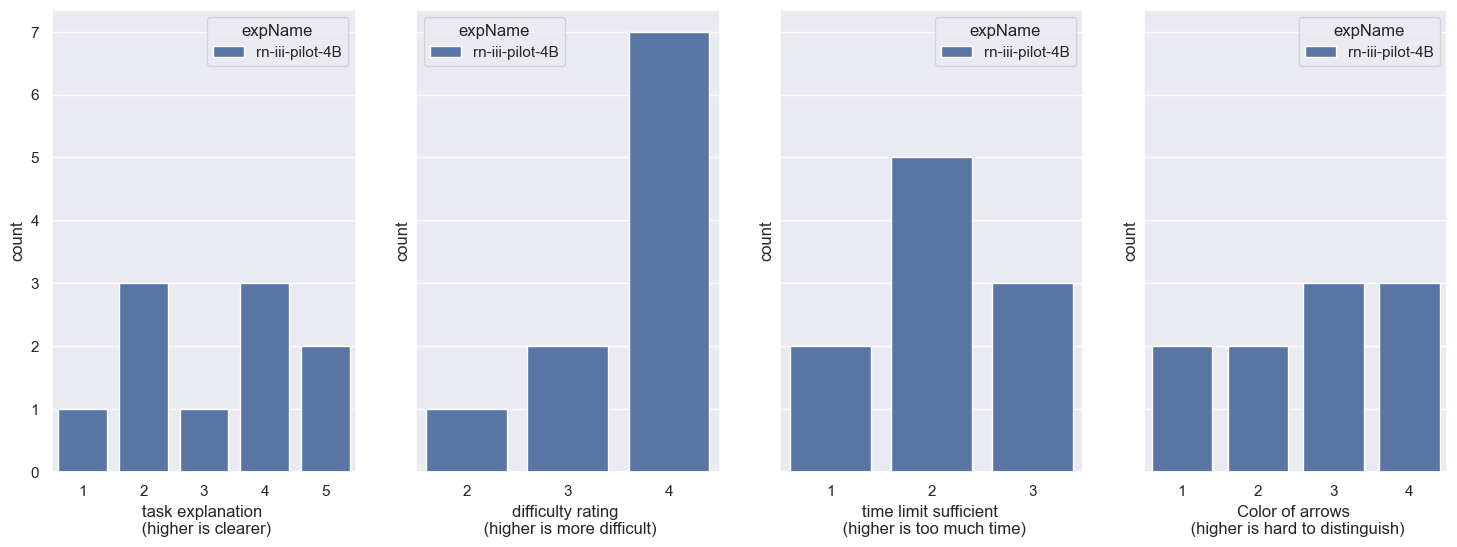

In [5]:
variables = ['task_explanation', 'difficulty_rating', 'time_limit_sufficient', 'arrows_color']
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, len(variables), sharey=True, figsize=(18, 6))

sns.countplot(data=post_survey_df, x="task_explanation", hue="expName", ax=ax1)
ax1.set_xlabel('task explanation \n (higher is clearer)')
sns.countplot(data=post_survey_df, x="difficulty_rating", hue="expName", ax=ax2)
ax2.set_xlabel('difficulty rating \n (higher is more difficult)')
sns.countplot(data=post_survey_df, x="time_limit_sufficient", hue="expName", ax=ax3)
ax3.set_xlabel('time limit sufficient \n (higher is too much time)')
sns.countplot(data=post_survey_df, x="arrows_color", hue="expName", ax=ax4)
ax4.set_xlabel('Color of arrows \n (higher is hard to distinguish)')

if to_save_plots:
    f.savefig(os.path.join(figures_path, 'post_survey.pdf'), format='pdf', dpi=300)
    f.savefig(os.path.join(figures_path, 'post_survey.png'), format='png', dpi=300)

## Scores plots
### preprocessing

In [6]:
scores_df.replace({"isAI": {True: 'AI', False: 'Human'}}, inplace=True)
scores_df.groupby(by=["expName","trialType","isAI"]).size()

expName          trialType      isAI 
rn-iii-pilot-4b  demonstration  AI       20
                                Human    20
                 individual     AI       40
                                Human    60
                 try_yourself   AI       10
                                Human    80
dtype: int64

In [7]:
scores_df

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score
0,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,NaN,try_yourself,NaN,NaN,NaN,NaN,NaN
1,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,0.0,individual,9d7903f67b2fe171f5843d7ad3c9fce6,1450.0,4.0,1300.0,1450.0
2,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,1.0,individual,374bc516bdd45055f2bc9c37ed210113,1250.0,4.0,1300.0,1250.0
3,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,2.0,individual,1299563582f09584a113bc83104b5bfd,750.0,4.0,400.0,750.0
4,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,3.0,individual,18ae60d3fa2b0e0e486d9c732124077c,850.0,4.0,800.0,850.0
...,...,...,...,...,...,...,...,...,...,...,...
225,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,25.0,individual,06af754607cd0efc5037a0964c7a923e,750.0,1.0,800.0,1250.0
226,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,26.0,individual,55c56434f3d6dd1b0b847b0d88b4c0b7,450.0,2.0,800.0,1250.0
227,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,27.0,individual,3ecff30189f7eb8392c67f31902b782b,500.0,2.0,800.0,1250.0
228,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,29.0,demonstration,125878087e4704c46faae7484deaa6d9,800.0,0.0,800.0,1450.0


In [8]:
scores_df_ai = scores_df[scores_df['isAI']=='AI']
scores_df_human = scores_df[scores_df['isAI']=='Human']

scores_df_human.loc[scores_df_human['trialIdx'].isin([10,13,17,20]), 'trialType'] = 'try_yourself_before'
scores_df_human.loc[scores_df_human['trialIdx'].isin([12,15,19,22]), 'trialType'] = 'try_yourself_after'
scores_df_human.loc[scores_df_human['trialIdx'].isin([4,5]), 'trialType'] = 'individual_before'
scores_df_human.loc[scores_df_human['trialIdx'].isin([24,25,26,27]), 'trialType'] = 'individual_after'

scores_df = pd.concat([scores_df_ai, scores_df_human])

In [9]:
# create plot hue
scores_df['plot_hue'] = scores_df['isAI'].astype(str) + ', ' + scores_df['trialType'].astype(str)
scores_df

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
0,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,NaN,try_yourself,NaN,NaN,NaN,NaN,NaN,"AI, try_yourself"
1,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,0.0,individual,9d7903f67b2fe171f5843d7ad3c9fce6,1450.0,4.0,1300.0,1450.0,"AI, individual"
2,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,1.0,individual,374bc516bdd45055f2bc9c37ed210113,1250.0,4.0,1300.0,1250.0,"AI, individual"
3,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,2.0,individual,1299563582f09584a113bc83104b5bfd,750.0,4.0,400.0,750.0,"AI, individual"
4,642bdb6f5b5b9c825f6d8abf,AI,rn-iii-pilot-4b,0,3.0,individual,18ae60d3fa2b0e0e486d9c732124077c,850.0,4.0,800.0,850.0,"AI, individual"
...,...,...,...,...,...,...,...,...,...,...,...,...
225,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,25.0,individual_after,06af754607cd0efc5037a0964c7a923e,750.0,1.0,800.0,1250.0,"Human, individual_after"
226,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,26.0,individual_after,55c56434f3d6dd1b0b847b0d88b4c0b7,450.0,2.0,800.0,1250.0,"Human, individual_after"
227,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,27.0,individual_after,3ecff30189f7eb8392c67f31902b782b,500.0,2.0,800.0,1250.0,"Human, individual_after"
228,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,29.0,demonstration,125878087e4704c46faae7484deaa6d9,800.0,0.0,800.0,1450.0,"Human, demonstration"


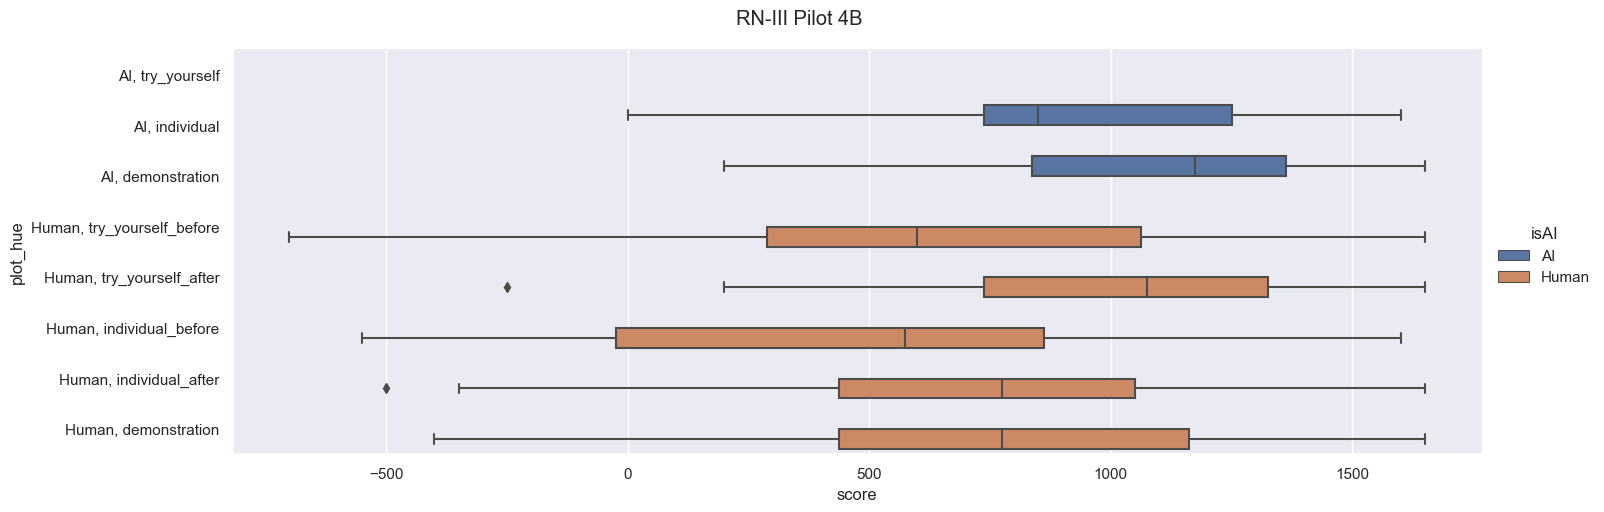

In [10]:
fig1 = sns.catplot(data=scores_df, x="score", y="plot_hue", hue='isAI', kind="box", height=5, aspect=3)
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle('RN-III Pilot 4B')

if to_save_plots:
    fig1.savefig(os.path.join(figures_path, 'Reward_boxplot_trial_type.pdf'), format='pdf', dpi=300)
    fig1.savefig(os.path.join(figures_path, 'Reward_boxplot_trial_type.png'), format='png', dpi=300)

In [11]:
# raincloud plot
import ptitprince as pt

scores_df_detailed = scores_df_human
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([10,13]), 'plot_hue'] = 'try_yourself_before1'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([12,15]), 'plot_hue'] = 'try_yourself_after1'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([17,20]), 'plot_hue'] = 'try_yourself_before2'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([19,22]), 'plot_hue'] = 'try_yourself_after2'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([4,5]), 'plot_hue'] = 'individual_before'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([24,25,26,27]), 'plot_hue'] = 'individual_after'
scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([29,30]), 'plot_hue'] = 'demonstration'

scores_df_detailed

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_2013/66656360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed.loc[scores_df_detailed['trialIdx'].isin([10,13]), 'plot_hue'] = 'try_yourself_before1'


,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue
70,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,10.0,try_yourself_before,5cb65dc7783fdcd893e39ac3e9a0eaad,-200.0,0.0,1100.0,1050.0,try_yourself_before1
71,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,12.0,try_yourself_after,5cb65dc7783fdcd893e39ac3e9a0eaad,700.0,4.0,1100.0,1050.0,try_yourself_after1
72,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,13.0,try_yourself_before,f8fa60dab58e7f8d327e920f750c2364,-200.0,0.0,300.0,1450.0,try_yourself_before1
73,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,15.0,try_yourself_after,f8fa60dab58e7f8d327e920f750c2364,-250.0,1.0,300.0,1450.0,try_yourself_after1
74,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,17.0,try_yourself_before,5cb65dc7783fdcd893e39ac3e9a0eaad,450.0,1.0,1100.0,1050.0,try_yourself_before2
...,...,...,...,...,...,...,...,...,...,...,...,...
225,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,25.0,individual_after,06af754607cd0efc5037a0964c7a923e,750.0,1.0,800.0,1250.0,individual_after
226,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,26.0,individual_after,55c56434f3d6dd1b0b847b0d88b4c0b7,450.0,2.0,800.0,1250.0,individual_after
227,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,27.0,individual_after,3ecff30189f7eb8392c67f31902b782b,500.0,2.0,800.0,1250.0,individual_after
228,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,29.0,demonstration,125878087e4704c46faae7484deaa6d9,800.0,0.0,800.0,1450.0,demonstration


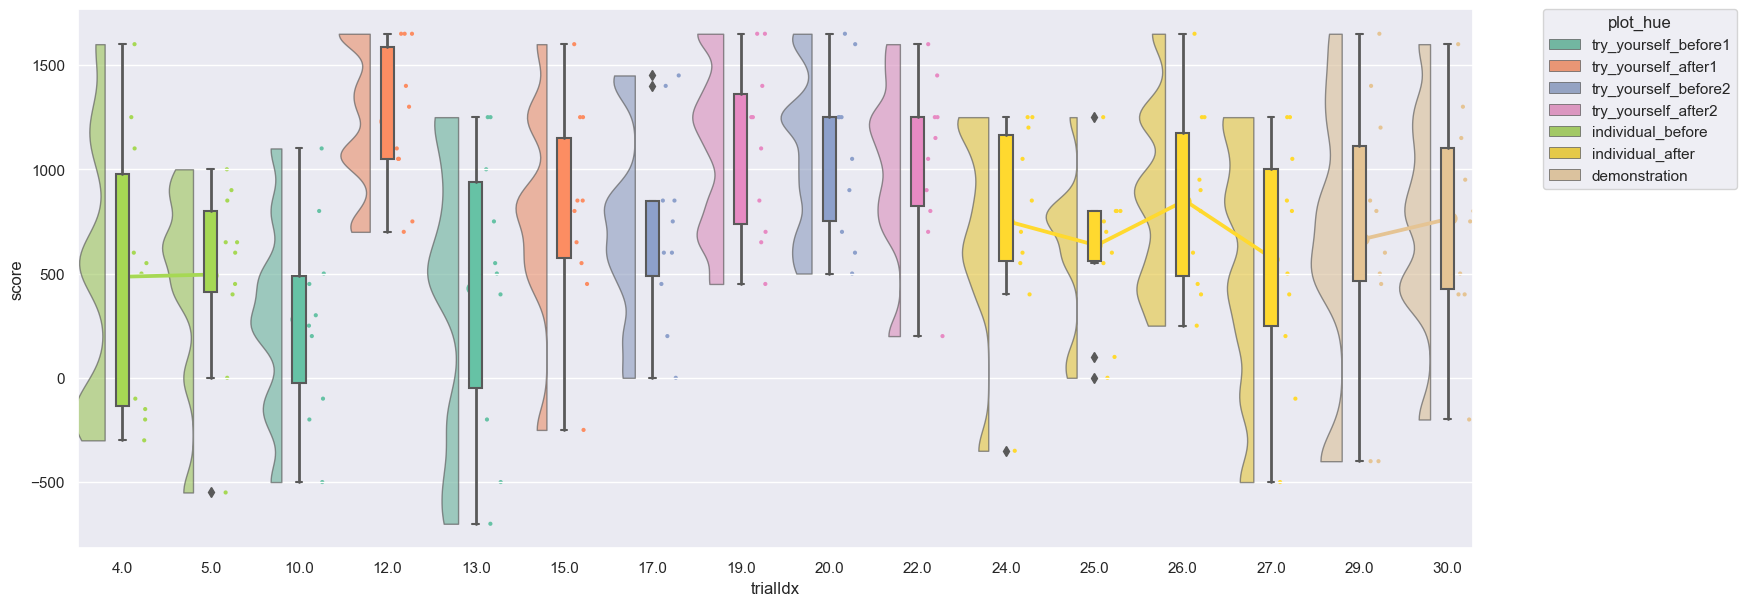

In [12]:
f, ax = plt.subplots(figsize=(18, 7))
pt.RainCloud(x = 'trialIdx', y = 'score', hue = 'plot_hue', data = scores_df_detailed, palette = "Set2", bw = .2, width_viol = .7, ax=ax, orient = 'v' , alpha = .65, dodge = False, pointplot = True, move = .2)

plt.savefig(os.path.join(figures_path, 'raincloud_score_over_trialIdx.pdf'), format='pdf', dpi=300)

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_2013/2131512879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed['plot_hue2'] = scores_df_detailed['trialIdx'].astype(int).astype(str) + '_' + scores_df_detailed['plot_hue']
/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_2013/2131512879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed['plot_hue2'] = pd.Categorical(scores_df_detailed['plot_hue2'], [ '4_individual_before',
/var/folders/bf/1wzkxhv

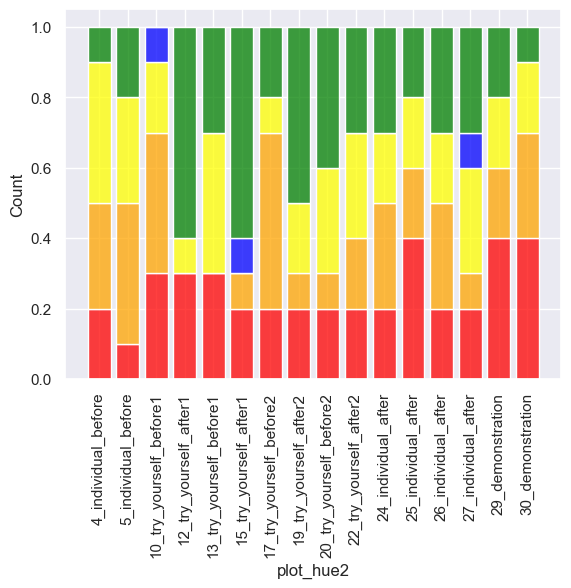

In [13]:
# max level reached plots
scores_df_detailed['plot_hue2'] = scores_df_detailed['trialIdx'].astype(int).astype(str) + '_' + scores_df_detailed['plot_hue']

scores_df_detailed['plot_hue2'] = pd.Categorical(scores_df_detailed['plot_hue2'], [ '4_individual_before',
 '5_individual_before','10_try_yourself_before1',
 '12_try_yourself_after1',
 '13_try_yourself_before1',
 '15_try_yourself_after1',
 '17_try_yourself_before2',
 '19_try_yourself_after2',
 '20_try_yourself_before2',
 '22_try_yourself_after2',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after',
 '27_individual_after',
 '29_demonstration',
 '30_demonstration'])

a = scores_df_detailed.groupby(by=['plot_hue2'])['maxLevelReached'].value_counts(normalize=True).to_frame('prop').reset_index()
#plot_order = a.sort_values(by=['trialIdx'], ascending=False).plot_hue.values
g = sns.histplot(a, x='plot_hue2', hue='maxLevelReached',weights='prop',multiple='stack', hue_order=[4,3,2,1,0],
                 palette={0:'red',
                                                                                                   1:'orange',
                                                                                                   2:'yellow',
                                                                                                   3:'blue',
                                                                                                   4:'green'}, shrink=0.8,
                 legend=False)
#g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels([ '4_individual_before',
 '5_individual_before','10_try_yourself_before1',
 '12_try_yourself_after1',
 '13_try_yourself_before1',
 '15_try_yourself_after1',
 '17_try_yourself_before2',
 '19_try_yourself_after2',
 '20_try_yourself_before2',
 '22_try_yourself_after2',
 '24_individual_after',
 '25_individual_after',
 '26_individual_after',
 '27_individual_after',
 '29_demonstration',
 '30_demonstration'],rotation=90)

plt.savefig(os.path.join(figures_path, 'raincloud_maxLevelReached_over_trialIdx.pdf'), format='pdf', dpi=300)

#f, ax = plt.subplots(figsize=(18, 7))
#g = pt.RainCloud(x = 'trialIdx', y = 'maxLevelReached', hue = 'plot_hue', data = scores_df_detailed, palette = "Set2", bw = .2, width_viol = .7, ax=ax, #orient = 'v' , alpha = .65, dodge = False, pointplot = True, move = .2)

#g.set(yticks=np.arange(0,5,1))
#g.set_yticklabels(np.arange(0,5,1))

## Find out Loss and Myopic advisors

In [14]:
moves = pd.read_csv(os.path.join(f"../../data/final/rn-iii-pilot-4b/moves.csv"),sep=',', index_col=0)
ai_session_ids = list(scores_df[scores_df['isAI']=='AI']['sessionId'].unique())
moves_ai = moves[moves['sessionId'].isin(ai_session_ids)]

moves_matches = moves_ai.groupby(by=['sessionId']).agg(n_myopic_matches=('matchesMyopic','sum'),
                                       n_ai_matches=('matchesAI','sum')).reset_index()

loss_ai = list(moves_matches[moves_matches['n_myopic_matches']<=1]['sessionId'])
myopic_ai = list(moves_matches[moves_matches['n_myopic_matches']>1]['sessionId'])

In [15]:
trial = pd.read_csv(os.path.join(f"../../data/final/rn-iii-pilot-4b/trial.csv"),sep=',')
trial

,Unnamed: 0,sessionId,generation,trialType,trialIdx,parentSessionId,parentSession_isAI
0,0,642bdb6f5b5b9c825f6d8abf,0,individual,0,NaN,NaN
1,1,642bdb6f5b5b9c825f6d8abf,0,individual,1,NaN,NaN
2,2,642bdb6f5b5b9c825f6d8abf,0,individual,2,NaN,NaN
3,3,642bdb6f5b5b9c825f6d8abf,0,individual,3,NaN,NaN
4,4,642bdb6f5b5b9c825f6d8abf,0,demonstration,4,NaN,NaN
...,...,...,...,...,...,...,...
405,405,642bdb6f5b5b9c825f6d8ad2,1,demonstration,29,NaN,NaN
406,406,642bdb6f5b5b9c825f6d8ad2,1,demonstration,30,NaN,NaN
407,407,642bdb6f5b5b9c825f6d8ad2,1,written_strategy,31,NaN,NaN
408,408,642bdb6f5b5b9c825f6d8ad2,1,post_survey,32,NaN,NaN


In [16]:
learned_from_myopic_ai = list(trial[trial['parentSessionId'].isin(myopic_ai)]['sessionId'].unique())
learned_from_loss_ai = list(trial[trial['parentSessionId'].isin(loss_ai)]['sessionId'].unique())

trial['parentSession_isMyopic'] = np.nan
trial.loc[ trial['parentSessionId'].isin(myopic_ai),'parentSession_isMyopic'] = True
trial.loc[ trial['parentSessionId'].isin(loss_ai),'parentSession_isMyopic'] = False

trial

,Unnamed: 0,sessionId,generation,trialType,trialIdx,parentSessionId,parentSession_isAI,parentSession_isMyopic
0,0,642bdb6f5b5b9c825f6d8abf,0,individual,0,NaN,NaN,NaN
1,1,642bdb6f5b5b9c825f6d8abf,0,individual,1,NaN,NaN,NaN
2,2,642bdb6f5b5b9c825f6d8abf,0,individual,2,NaN,NaN,NaN
3,3,642bdb6f5b5b9c825f6d8abf,0,individual,3,NaN,NaN,NaN
4,4,642bdb6f5b5b9c825f6d8abf,0,demonstration,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
405,405,642bdb6f5b5b9c825f6d8ad2,1,demonstration,29,NaN,NaN,NaN
406,406,642bdb6f5b5b9c825f6d8ad2,1,demonstration,30,NaN,NaN,NaN
407,407,642bdb6f5b5b9c825f6d8ad2,1,written_strategy,31,NaN,NaN,NaN
408,408,642bdb6f5b5b9c825f6d8ad2,1,post_survey,32,NaN,NaN,NaN


In [17]:
trial.groupby(by=['sessionId']).agg(n_counts = ('parentSession_isMyopic', 'value_counts'))

n_counts
sessionId                parentSession_isMyopic          
642bdb6f5b5b9c825f6d8ac9 False                         12
642bdb6f5b5b9c825f6d8aca False                         12
642bdb6f5b5b9c825f6d8acb False                         12
642bdb6f5b5b9c825f6d8acc False                         12
642bdb6f5b5b9c825f6d8acd False                         12
642bdb6f5b5b9c825f6d8ace False                          6
                         True                           6
642bdb6f5b5b9c825f6d8acf True                          12
642bdb6f5b5b9c825f6d8ad0 True                          12
642bdb6f5b5b9c825f6d8ad1 True                          12
642bdb6f5b5b9c825f6d8ad2 False                          6
                         True                           6

In [18]:
sessions_learn_only_loss = ['642bdb6f5b5b9c825f6d8ac9','642bdb6f5b5b9c825f6d8aca','642bdb6f5b5b9c825f6d8acb','642bdb6f5b5b9c825f6d8acc','642bdb6f5b5b9c825f6d8acd']
sessions_learn_only_myopic = ['642bdb6f5b5b9c825f6d8acf','642bdb6f5b5b9c825f6d8ad0','642bdb6f5b5b9c825f6d8ad1']
sessions_learn_both = ['642bdb6f5b5b9c825f6d8ad2','642bdb6f5b5b9c825f6d8ace']

scores_df_detailed['group'] = 'both'
scores_df_detailed.loc[scores_df_detailed['sessionId'].isin(sessions_learn_only_loss),'group']='loss_only'
scores_df_detailed.loc[scores_df_detailed['sessionId'].isin(sessions_learn_only_myopic),'group']='myopic_only'

scores_df_detailed

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_2013/2366711539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df_detailed['group'] = 'both'


,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue,plot_hue2,group
70,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,10.0,try_yourself_before,5cb65dc7783fdcd893e39ac3e9a0eaad,-200.0,0.0,1100.0,1050.0,try_yourself_before1,10_try_yourself_before1,loss_only
71,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,12.0,try_yourself_after,5cb65dc7783fdcd893e39ac3e9a0eaad,700.0,4.0,1100.0,1050.0,try_yourself_after1,12_try_yourself_after1,loss_only
72,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,13.0,try_yourself_before,f8fa60dab58e7f8d327e920f750c2364,-200.0,0.0,300.0,1450.0,try_yourself_before1,13_try_yourself_before1,loss_only
73,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,15.0,try_yourself_after,f8fa60dab58e7f8d327e920f750c2364,-250.0,1.0,300.0,1450.0,try_yourself_after1,15_try_yourself_after1,loss_only
74,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,17.0,try_yourself_before,5cb65dc7783fdcd893e39ac3e9a0eaad,450.0,1.0,1100.0,1050.0,try_yourself_before2,17_try_yourself_before2,loss_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,25.0,individual_after,06af754607cd0efc5037a0964c7a923e,750.0,1.0,800.0,1250.0,individual_after,25_individual_after,both
226,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,26.0,individual_after,55c56434f3d6dd1b0b847b0d88b4c0b7,450.0,2.0,800.0,1250.0,individual_after,26_individual_after,both
227,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,27.0,individual_after,3ecff30189f7eb8392c67f31902b782b,500.0,2.0,800.0,1250.0,individual_after,27_individual_after,both
228,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,29.0,demonstration,125878087e4704c46faae7484deaa6d9,800.0,0.0,800.0,1450.0,demonstration,29_demonstration,both


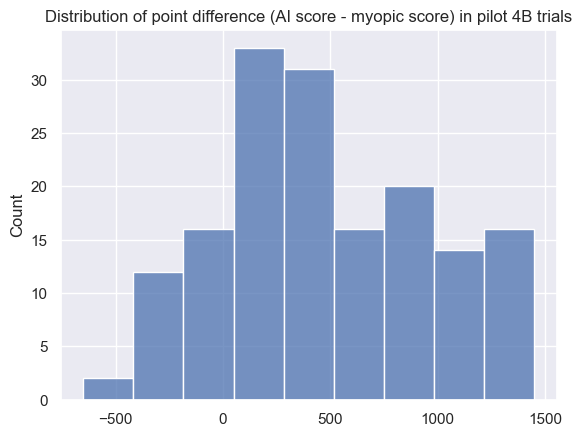

In [19]:
diff_scores = scores_df_detailed['ai_score'] - scores_df_detailed['myopic_score']
sns.histplot(diff_scores).set(title='Distribution of point difference (AI score - myopic score) in pilot 4B trials')
plt.savefig(os.path.join(figures_path, 'diff_myopic_loss_scores.png'), format='png',dpi=300)

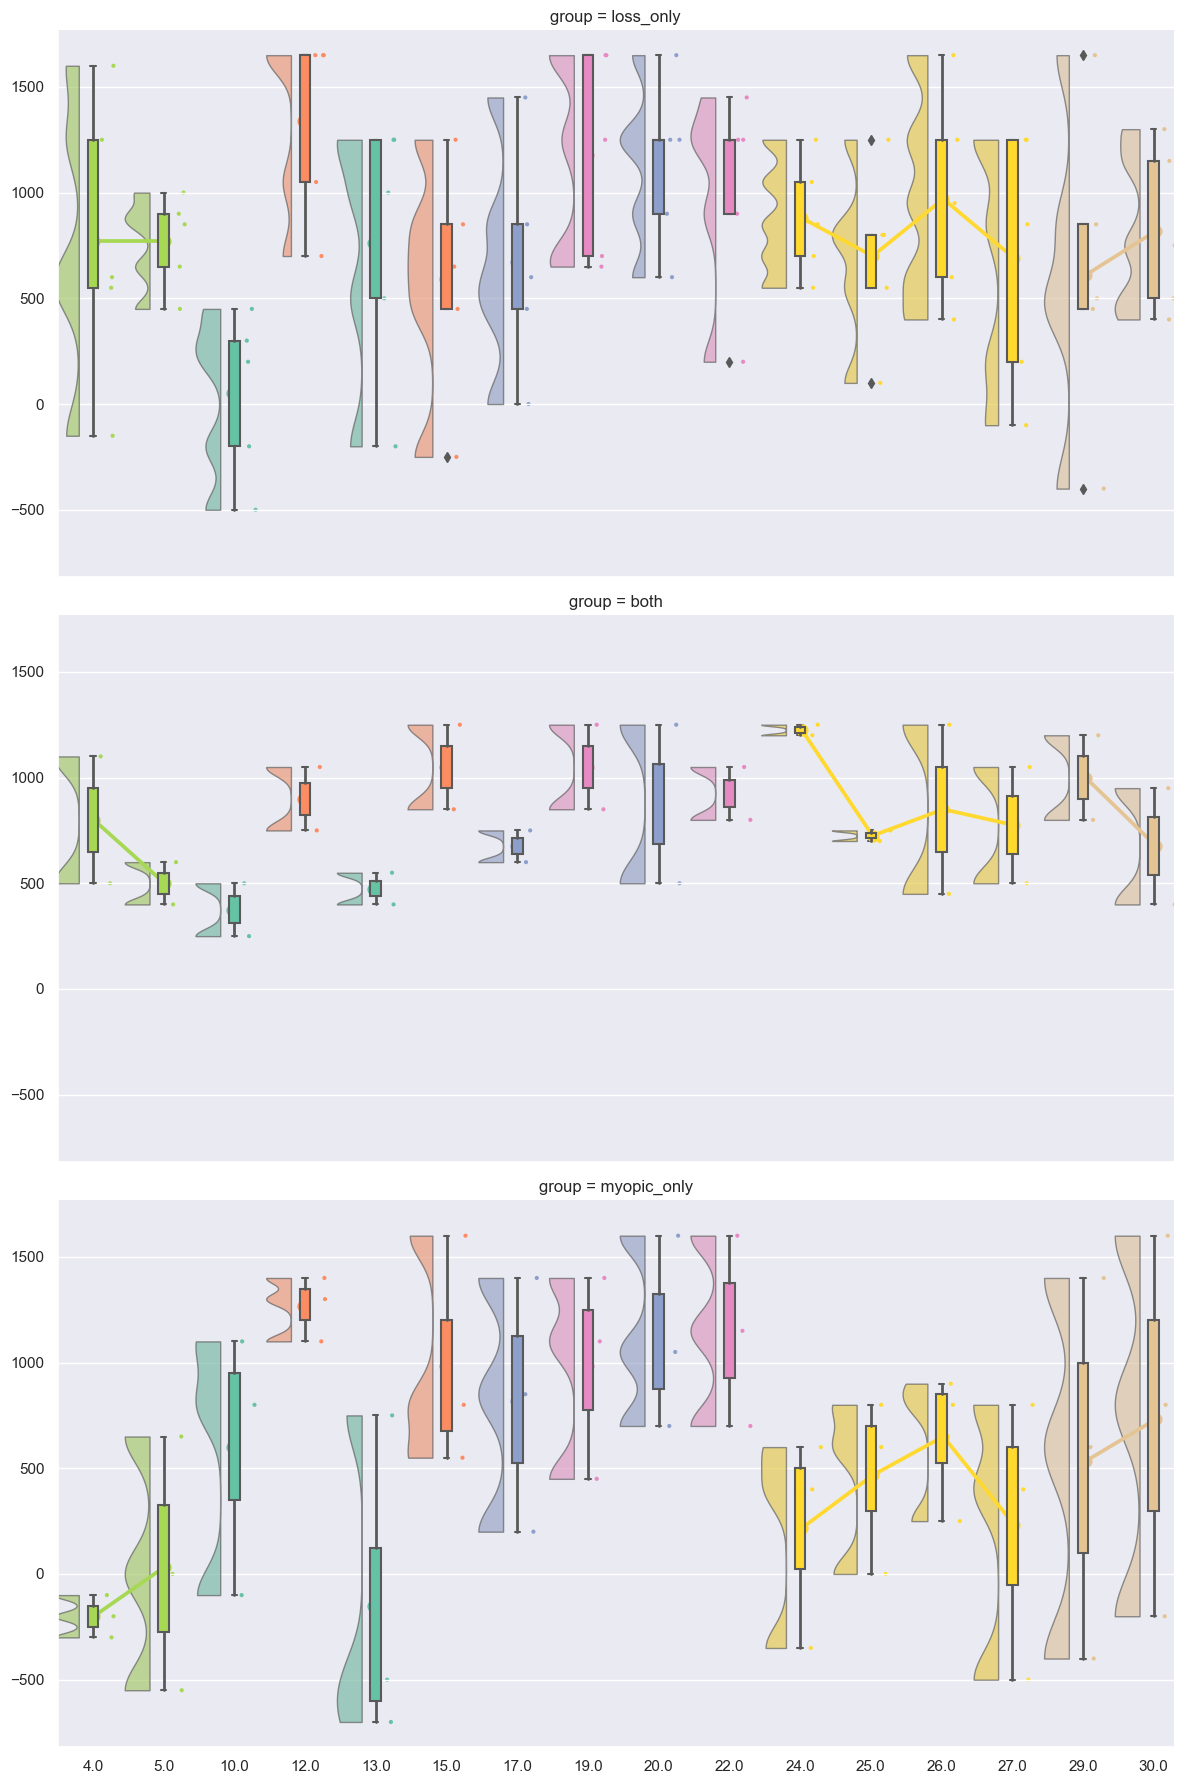

In [20]:
# Rainclouds with FacetGrid
g = sns.FacetGrid(scores_df_detailed, row = "group", height = 6, aspect=2)
g = g.map_dataframe(pt.RainCloud,
                    x = 'trialIdx',
                    y = 'score',
                    hue = 'plot_hue',
                    data = scores_df_detailed,
                    palette = "Set2",
                    bw = .2,
                    width_viol = .7,
                    orient = 'v' ,
                    alpha = .65,
                    dodge = False,
                    pointplot = True,
                    move = .2)

plt.savefig(os.path.join(figures_path,'raincloud_score_over_trialIdx_advisorGroup.pdf'),format='pdf',dpi=300)

## Missing steps

In [21]:
human_session_ids = list(scores_df[scores_df['isAI']=='Human']['sessionId'].unique())
moves_human = moves[moves['sessionId'].isin(human_session_ids)]
missings = moves_human.groupby(by=['sessionId','trialID']).agg(n_missings=('isMissing','sum')).reset_index()

print(f"{len(missings[missings['n_missings']>0])} out of {len(missings)} trials ({len(missings[missings['n_missings']>0]) / len(missings) *100} %) have missing steps")

28 out of 160 trials (17.5 %) have missing steps


In [22]:
missings[missings['n_missings']>0]['n_missings'].value_counts(normalize=True)

1    0.250000
5    0.214286
4    0.142857
6    0.142857
2    0.142857
3    0.071429
7    0.035714
Name: n_missings, dtype: float64

In [24]:
print(f"{len(missings[missings['n_missings']>1])} out of {len(missings)} trials ({len(missings[missings['n_missings']>1]) / len(missings) *100} %) have missing steps")

21 out of 160 trials (13.125 %) have missing steps


In [25]:
scores_df_detailed

,sessionId,isAI,expName,generation,trialIdx,trialType,networkId,score,maxLevelReached,myopic_score,ai_score,plot_hue,plot_hue2,group
70,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,10.0,try_yourself_before,5cb65dc7783fdcd893e39ac3e9a0eaad,-200.0,0.0,1100.0,1050.0,try_yourself_before1,10_try_yourself_before1,loss_only
71,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,12.0,try_yourself_after,5cb65dc7783fdcd893e39ac3e9a0eaad,700.0,4.0,1100.0,1050.0,try_yourself_after1,12_try_yourself_after1,loss_only
72,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,13.0,try_yourself_before,f8fa60dab58e7f8d327e920f750c2364,-200.0,0.0,300.0,1450.0,try_yourself_before1,13_try_yourself_before1,loss_only
73,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,15.0,try_yourself_after,f8fa60dab58e7f8d327e920f750c2364,-250.0,1.0,300.0,1450.0,try_yourself_after1,15_try_yourself_after1,loss_only
74,642bdb6f5b5b9c825f6d8ac9,Human,rn-iii-pilot-4b,1,17.0,try_yourself_before,5cb65dc7783fdcd893e39ac3e9a0eaad,450.0,1.0,1100.0,1050.0,try_yourself_before2,17_try_yourself_before2,loss_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,25.0,individual_after,06af754607cd0efc5037a0964c7a923e,750.0,1.0,800.0,1250.0,individual_after,25_individual_after,both
226,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,26.0,individual_after,55c56434f3d6dd1b0b847b0d88b4c0b7,450.0,2.0,800.0,1250.0,individual_after,26_individual_after,both
227,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,27.0,individual_after,3ecff30189f7eb8392c67f31902b782b,500.0,2.0,800.0,1250.0,individual_after,27_individual_after,both
228,642bdb6f5b5b9c825f6d8ad2,Human,rn-iii-pilot-4b,1,29.0,demonstration,125878087e4704c46faae7484deaa6d9,800.0,0.0,800.0,1450.0,demonstration,29_demonstration,both


In [26]:
true_missings = missings[missings['n_missings']>0]
true_missings['trialType']='demonstration'
true_missings.loc[true_missings['trialID'].isin([4,5]),'trialType'] = 'individual_before'
true_missings.loc[true_missings['trialID'].between(10,22),'trialType'] = 'try_yourself_before'
true_missings.loc[true_missings['trialID'].isin([24,25,26,27]),'trialType'] = 'individual_after'
true_missings['trialType'].value_counts(normalize=True)

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_2013/4228956030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_missings['trialType']='demonstration'


try_yourself_before    0.464286
individual_before      0.250000
individual_after       0.178571
demonstration          0.107143
Name: trialType, dtype: float64

In [27]:
missings.groupby(by=['sessionId']).apply(lambda x: len(x[x['n_missings']>0]))

sessionId
642bdb6f5b5b9c825f6d8ac9    3
642bdb6f5b5b9c825f6d8aca    3
642bdb6f5b5b9c825f6d8acb    2
642bdb6f5b5b9c825f6d8acc    4
642bdb6f5b5b9c825f6d8acd    0
642bdb6f5b5b9c825f6d8ace    3
642bdb6f5b5b9c825f6d8acf    2
642bdb6f5b5b9c825f6d8ad0    3
642bdb6f5b5b9c825f6d8ad1    8
642bdb6f5b5b9c825f6d8ad2    0
dtype: int64

## time spent plots

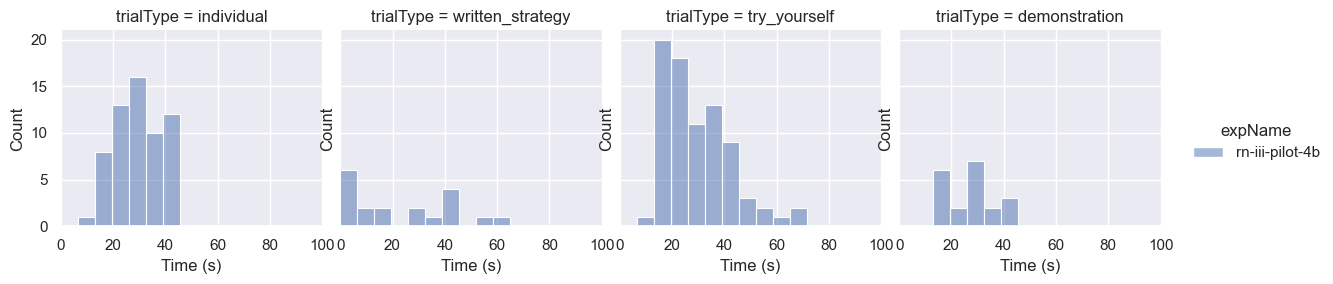

In [29]:
fig2 = sns.displot(trials_time,
                   x="duration",
                   hue="expName",
                   col="trialType",
                   kind='hist',
                   stat='count',
                   height=3)
# add label to the axis and label to the plot
fig2.set(xlabel="Time (s)", xlim=(0, 100), ylabel="Count")
if to_save_plots:
    fig2.savefig(os.path.join(figures_path, f'Time_dist_trial_type.pdf'), format='pdf', dpi=300)
    fig2.savefig(os.path.join(figures_path, f'Time_dist_trial_type.png'), format='png', dpi=300)

,Unnamed: 0,expName,sessionId,trialId,trialType,duration
0,0,rn-iii-pilot-4b,642bdc755b5b9c825f6d8ad5,4,individual,26
1,1,rn-iii-pilot-4b,642bdc755b5b9c825f6d8ad5,5,individual,17
2,2,rn-iii-pilot-4b,642bdc755b5b9c825f6d8ad5,6,written_strategy,16
3,3,rn-iii-pilot-4b,642bdc755b5b9c825f6d8ad5,10,try_yourself,38
4,4,rn-iii-pilot-4b,642bdc755b5b9c825f6d8ad5,12,try_yourself,24
...,...,...,...,...,...,...
175,175,rn-iii-pilot-4b,642be0665b5b9c825f6d8ade,26,individual,28
176,176,rn-iii-pilot-4b,642be0665b5b9c825f6d8ade,27,individual,31
177,177,rn-iii-pilot-4b,642be0665b5b9c825f6d8ade,29,demonstration,32
178,178,rn-iii-pilot-4b,642be0665b5b9c825f6d8ade,30,demonstration,33
